-BG on Maternal Mortality and why topic was chosen

Overview of what I will be doing

In [316]:
import requests
import pandas as pd
import matplotlib as p
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import folium

df = pd.read_csv('Maternal_Mortality.csv')
mat_mort = df[['ParentLocation', 'Location','Period', 'FactValueNumeric']].dropna()
mat_mort = mat_mort.rename(columns={'ParentLocation':'Region', 'Location': 'Country', 'Period': 'Year', 'FactValueNumeric': 'Maternal_Death_Rate'})
n = mat_mort.isnull().values.any() 

if n:
    print(n)

mat_mort.head()

,Region,Country,Year,Maternal_Death_Rate
0,Africa,Sierra Leone,2017,1120
1,Africa,Chad,2017,1140
2,Africa,South Sudan,2017,1150
3,Europe,Bosnia and Herzegovina,2017,10
4,Europe,Bulgaria,2017,10


Explanation of data cleaning

In [317]:
#getting data of the gdp for each country
data = pd.read_csv('GDP_By_Country(1).csv')

#reorganizing as we only need 2000-2017 to connect the maternal mortality data
gdp = data[['Country Name', '2000', '2001', '2002','2003',
    '2004','2005','2006','2007', '2008','2009','2010','2011',
    '2012','2013','2014', '2015', '2016', '2017']]

#melting the years into a single column
gdp = pd.melt(gdp, id_vars=['Country Name'], value_vars=['2000', '2001', '2002','2003',
    '2004','2005','2006','2007', '2008','2009','2010','2011',
    '2012','2013','2014', '2015', '2016', '2017'],var_name='Year', value_name='GDP').sort_values('Country Name')
    
#resetting the index 
gdp = gdp.reset_index()
gdp = gdp[['Country Name', 'Year', 'GDP']].dropna()
gdp = gdp.rename(columns={'Country Name': 'Country'})

n = gdp.isnull().values.any()
if n:
    print(n)
    
gdp.head()

,Country,Year,GDP
0,Afghanistan,2017,1.886995e+10
1,Afghanistan,2009,1.243909e+10
2,Afghanistan,2013,2.056107e+10
4,Afghanistan,2015,1.990711e+10
5,Afghanistan,2005,6.209138e+09


In [334]:
#making the "year" column is numeric to mathc both dataset types
gdp["Year"] = pd.to_numeric(gdp["Year"])
#Merge two data sets
mortality_gdp = mat_mort.merge(gdp, how='inner', left_on=["Country", "Year"], right_on=["Country","Year"])
mortality_gdp.head()

,Region,Country,Year,Maternal_Death_Rate,GDP
0,Africa,Sierra Leone,2017,1120,3.739578e+09
1,Africa,Sierra Leone,2017,2900,3.739578e+09
2,Africa,Chad,2017,1140,1.000040e+10
3,Africa,Chad,2017,7300,1.000040e+10
4,Europe,Bosnia and Herzegovina,2017,10,1.808012e+10


In [335]:
#Keeping the 'first' instance since it keeps the rate, the second instance is the actual total
mortality_gdp.drop_duplicates(subset =['Country', 'Year'], keep = 'first', inplace = True)
mortality_gdp.head() 

,Region,Country,Year,Maternal_Death_Rate,GDP
0,Africa,Sierra Leone,2017,1120,3.739578e+09
2,Africa,Chad,2017,1140,1.000040e+10
4,Europe,Bosnia and Herzegovina,2017,10,1.808012e+10
6,Europe,Bulgaria,2017,10,5.897152e+10
8,Europe,Kazakhstan,2017,10,1.668060e+11


<AxesSubplot:title={'center':'Maternal Mortality Rate 2000-2017'}, xlabel='Year', ylabel='Maternal_Death_Rate'>

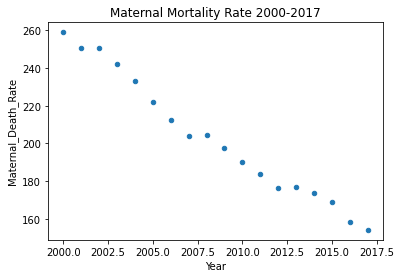

In [320]:
#comparing the rate averages for each year
year_group = mortality_gdp.groupby('Year')
year_means = year_group.mean()
year_means = year_means.reset_index()
year_means.plot(kind = 'scatter', x = 'Year' , y = 'Maternal_Death_Rate', title = 'Maternal Mortality Rate 2000-2017')

Commentary on how the trend looks generally

<AxesSubplot:title={'center':'Maternal Mortality Rate By Region'}, xlabel='Region', ylabel='Maternal_Death_Rate'>

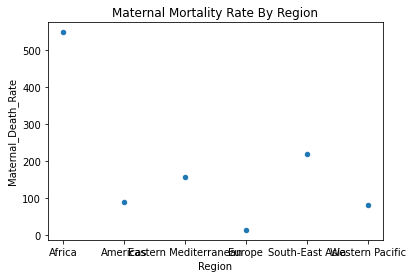

In [321]:
#Avg death rate by region
reg_group = mortality_gdp.groupby('Region')
reg_means = reg_group.mean()
reg_means = reg_means.reset_index()
reg_means.plot(kind = 'scatter', x = 'Region' , y = 'Maternal_Death_Rate', title = 'Maternal Mortality Rate By Region')

C:\Users\Daria\AppData\Local\Temp/ipykernel_22188/1372808045.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1c8e98b9e80>,
 'cmeans': <matplotlib.collections.LineCollection at 0x1c8e98b98b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c8e9869eb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c8e99a8850>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c8e9865e20>}

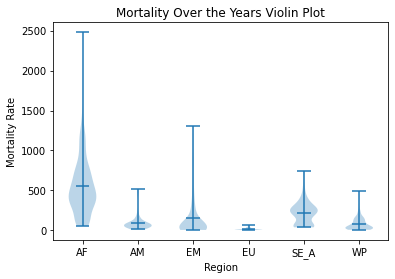

In [322]:
#Violin plot of how the rate is in region
years = {'Africa':[], 'Americas':[], 'Eastern Mediterranean':[], 'Europe':[],
 'South-East Asia':[], 'Western Pacific':[]}
for index, row in mortality_gdp.iterrows():
    y = str(row['Region'])
    years[y].append(row['Maternal_Death_Rate'])
#2d array for grapphing purposes
y = [[0]]*6
ind = 0
for i in years.keys():
    y[ind]= years[i]
    ind = ind+1
    
fig, ax = plt.subplots()

xticklabels = ['placement','AF','AM', 'EM', 'EU', 'SE_A', 'WP']

ax.set_xticklabels(xticklabels)
ax.set_xlabel("Region")
ax.set_ylabel("Mortality Rate")
ax.set_title("Mortality Over the Years Violin Plot")
ax.violinplot(y, showmeans=True)

<AxesSubplot:title={'center':'Avg GDP By Region'}, xlabel='Region', ylabel='GDP'>

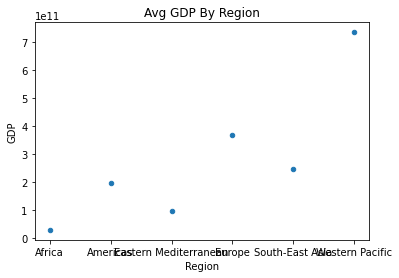

In [323]:
gdp_group = mortality_gdp.groupby('Region')
reg_means = reg_group.mean()
reg_means = reg_means.reset_index()
reg_means.plot(kind = 'scatter', x = 'Region' , y = 'GDP', title = 'Avg GDP By Region')

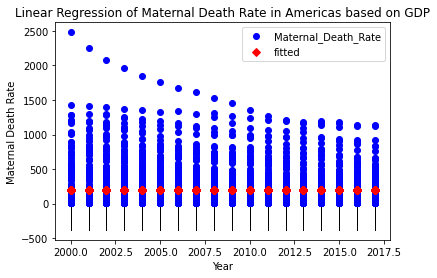

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.319
Model:                             OLS   Adj. R-squared (uncentered):              0.318
Method:                  Least Squares   F-statistic:                              1310.
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                   1.23e-235
Time:                         21:36:42   Log-Likelihood:                         -19931.
No. Observations:                 2802   AIC:                                  3.986e+04
Df Residuals:                     2801   BIC:                                  3.987e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [324]:
mod = sm.OLS(mortality_gdp['Maternal_Death_Rate'], mortality_gdp['Year'])
year_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(year_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("Year")
ax.set_title("Linear Regression of Maternal Death Rate in Americas based on GDP")
plt.show()
print(year_fit.summary())

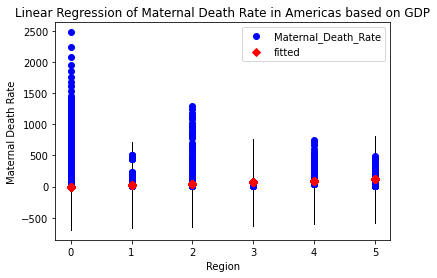

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.029
Model:                             OLS   Adj. R-squared (uncentered):              0.029
Method:                  Least Squares   F-statistic:                              83.48
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                    1.20e-19
Time:                         21:36:42   Log-Likelihood:                         -20427.
No. Observations:                 2802   AIC:                                  4.086e+04
Df Residuals:                     2801   BIC:                                  4.086e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [325]:
from sklearn.preprocessing import LabelEncoder
mortality_gdp['Encode_Region'] = LabelEncoder().fit_transform(mortality_gdp['Region'])
mod = sm.OLS(mortality_gdp['Maternal_Death_Rate'], mortality_gdp['Encode_Region'])
reg_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(reg_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("Region")
ax.set_title("Linear Regression of Maternal Death Rate in Americas based on GDP")
plt.show()
print(reg_fit.summary())

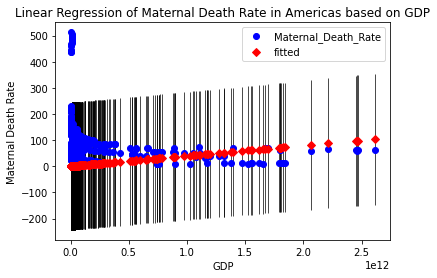

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.023
Model:                             OLS   Adj. R-squared (uncentered):              0.021
Method:                  Least Squares   F-statistic:                              11.51
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                    0.000747
Time:                         21:36:43   Log-Likelihood:                         -3031.7
No. Observations:                  486   AIC:                                      6065.
Df Residuals:                      485   BIC:                                      6070.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [326]:
americas_data = mortality_gdp[~(mortality_gdp.Region.isin(['Africa', 'Europe', 'Eastern Mediterranean', 'Western Pacific', 'South-East Asia']))]
mod = sm.OLS(americas_data['Maternal_Death_Rate'], americas_data['GDP'])
am_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(am_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("GDP")
ax.set_title("Linear Regression of Maternal Death Rate in Americas based on GDP")
plt.show()
print(am_fit.summary())

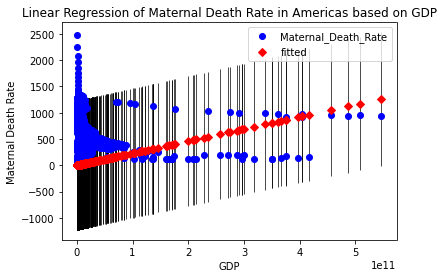

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.073
Model:                             OLS   Adj. R-squared (uncentered):              0.071
Method:                  Least Squares   F-statistic:                              57.71
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                    9.24e-14
Time:                         21:36:43   Log-Likelihood:                         -5806.8
No. Observations:                  739   AIC:                                  1.162e+04
Df Residuals:                      738   BIC:                                  1.162e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [327]:
africa_data = mortality_gdp[~(mortality_gdp.Region.isin(['Americas', 'Europe', 'Eastern Mediterranean', 'Western Pacific', 'South-East Asia']))]
mod = sm.OLS(africa_data['Maternal_Death_Rate'], africa_data['GDP'])
af_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(af_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("GDP")
ax.set_title("Linear Regression of Maternal Death Rate in Africa based on GDP")
plt.show()
print(af_fit.summary())

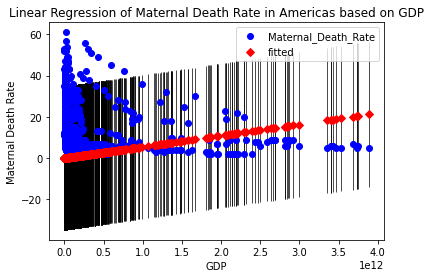

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.053
Model:                             OLS   Adj. R-squared (uncentered):              0.052
Method:                  Least Squares   F-statistic:                              44.10
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                    5.80e-11
Time:                         21:36:43   Log-Likelihood:                         -3399.5
No. Observations:                  792   AIC:                                      6801.
Df Residuals:                      791   BIC:                                      6806.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [328]:
eu_data = mortality_gdp[~(mortality_gdp.Region.isin(['Africa', 'Americas', 'Eastern Mediterranean', 'Western Pacific', 'South-East Asia']))]
mod = sm.OLS(eu_data['Maternal_Death_Rate'], eu_data['GDP'])
eu_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(eu_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("GDP")
ax.set_title("Linear Regression of Maternal Death Rate in Europe based on GDP")
plt.show()
print(eu_fit.summary())

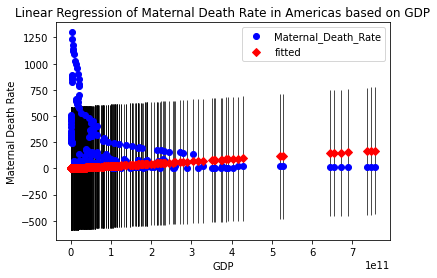

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.015
Model:                             OLS   Adj. R-squared (uncentered):              0.012
Method:                  Least Squares   F-statistic:                              4.485
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                      0.0350
Time:                         21:36:44   Log-Likelihood:                         -2127.7
No. Observations:                  299   AIC:                                      4257.
Df Residuals:                      298   BIC:                                      4261.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [329]:
med_data = mortality_gdp[~(mortality_gdp.Region.isin(['Africa', 'Europe', 'Americas', 'Western Pacific', 'South-East Asia']))]
mod = sm.OLS(med_data['Maternal_Death_Rate'], med_data['GDP'])
med_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(med_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("GDP")
ax.set_title("Linear Regression of Maternal Death Rate in Eastern Mediterranean based on GDP")
plt.show()
print(med_fit.summary())

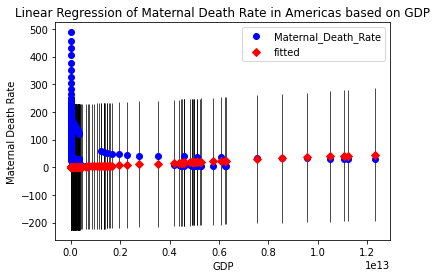

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.005
Model:                             OLS   Adj. R-squared (uncentered):              0.001
Method:                  Least Squares   F-statistic:                              1.383
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                       0.241
Time:                         21:36:44   Log-Likelihood:                         -1886.3
No. Observations:                  306   AIC:                                      3775.
Df Residuals:                      305   BIC:                                      3778.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [330]:
pac_data = mortality_gdp[~(mortality_gdp.Region.isin(['Africa', 'Europe', 'Americas', 'Eastern Mediterranean', 'South-East Asia']))]
mod = sm.OLS(pac_data['Maternal_Death_Rate'], pac_data['GDP'])
pac_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(pac_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("GDP")
ax.set_title("Linear Regression of Maternal Death Rate in Western Pacific based on GDP")
plt.show()
print(pac_fit.summary())

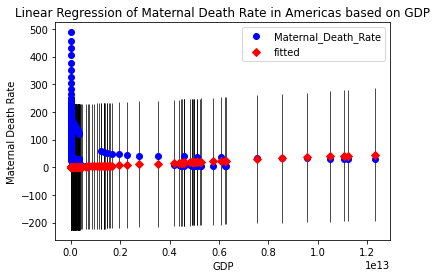

                                 OLS Regression Results                                 
Dep. Variable:     Maternal_Death_Rate   R-squared (uncentered):                   0.005
Model:                             OLS   Adj. R-squared (uncentered):              0.001
Method:                  Least Squares   F-statistic:                              1.383
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):                       0.241
Time:                         21:36:45   Log-Likelihood:                         -1886.3
No. Observations:                  306   AIC:                                      3775.
Df Residuals:                      305   BIC:                                      3778.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [331]:
sea_data = mortality_gdp[~(mortality_gdp.Region.isin(['Africa', 'Europe', 'Americas', 'Eastern Mediterranean', 'South-East Asia']))]
mod = sm.OLS(sea_data['Maternal_Death_Rate'], sea_data['GDP'])
sea_fit = mod.fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(sea_fit, 0, ax=ax)
ax.set_ylabel("Maternal Death Rate")
ax.set_xlabel("GDP")
ax.set_title("Linear Regression of Maternal Death Rate in South-East Asia based on GDP")
plt.show()
print(sea_fit.summary())

In [337]:
mod = smf.ols(formula='Maternal_Death_Rate ~ GDP + Region + Year + (GDP*Region*Year)', data=mortality_gdp)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Maternal_Death_Rate   R-squared:                       0.525
Model:                             OLS   Adj. R-squared:                  0.523
Method:                  Least Squares   F-statistic:                     181.4
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                         21:42:14   Log-Likelihood:                -18886.
No. Observations:                 2802   AIC:                         3.781e+04
Df Residuals:                     2784   BIC:                         3.791e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [338]:
mod = smf.ols(formula='Maternal_Death_Rate ~ GDP + Region + (GDP*Region)', data=mortality_gdp)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Maternal_Death_Rate   R-squared:                       0.525
Model:                             OLS   Adj. R-squared:                  0.523
Method:                  Least Squares   F-statistic:                     280.5
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                         21:43:01   Log-Likelihood:                -18887.
No. Observations:                 2802   AIC:                         3.780e+04
Df Residuals:                     2790   BIC:                         3.787e+04
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [339]:
mod = smf.ols(formula='Maternal_Death_Rate ~ Year + Region + (Year*Region)', data=mortality_gdp)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Maternal_Death_Rate   R-squared:                       0.543
Model:                             OLS   Adj. R-squared:                  0.542
Method:                  Least Squares   F-statistic:                     302.0
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                         21:44:17   Log-Likelihood:                -18832.
No. Observations:                 2802   AIC:                         3.769e+04
Df Residuals:                     2790   BIC:                         3.776e+04
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [340]:
mod = smf.ols(formula='Maternal_Death_Rate ~ Year + GDP + (Year*GDP)', data=mortality_gdp)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Maternal_Death_Rate   R-squared:                       0.030
Model:                             OLS   Adj. R-squared:                  0.030
Method:                  Least Squares   F-statistic:                     43.83
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):           1.81e-19
Time:                         21:44:59   Log-Likelihood:                -19887.
No. Observations:                 2802   AIC:                         3.978e+04
Df Residuals:                     2799   BIC:                         3.980e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.462e-05   1.44e-06     37.84

Conclusion